In [1]:
from cellmemory import cm
from cellmemory import plot
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Train model

When you use CellMemory with datasets that have a strong technical bias - like integrating single-cell 
RNA-seq and single-cell spatial transcriptomics data.
We suggest using the preprocessing option "exp_bin='bin_scale'".  
This strategy put the expression values of nonzero genes into bins (1-50), making it more resistant to
batch effects, similar to the strategy used in scGPT.
The following case uses the CellMemory-full mode (use_amp=False, mode='full'), which is computationally fast given the relatively small number of genes in the Xenium dataset.  
The hBreast_xenium data path: https://figshare.com/account/projects/241457/articles/28917527

In [2]:
batch_size = 1024
Dataset = 'hBreastCancer_sc_train.h5ad'  # train data path
Label = 'celltype_major'   # cell type
Project = 'cm_hBreastCancer'  # Project name

# >> Forming intuition for cells.. << #
# *********************************** #
Parameter setting: -Project cm_hBreastCancer -Label celltype_major -batch_size 1024 -exp_bin bin_scale -use_amp False -seed 123
Reading Data: cm_hBreastCancer
Train set: (75628, 301)
Valid set: (18907, 301)
Max bins: 50
Learning Categories: 9
use topk: False
Using 1 GPU.
CellMemory is delineating cell representations..



[Epoch:  1]: Train >>>  Loss:1.530  Acc: 51.37  F1: 24.70


[Epoch:  1]: Valid >>>  Loss:0.539  Acc: 84.21  F1: 62.12
Model saved..
Run time: 24 s



[Epoch:  2]: Train >>>  Loss:0.263  Acc: 92.10  F1: 85.37


[Epoch:  2]: Valid >>>  Loss:0.126  Acc: 96.10  F1: 93.47
Model saved..
Run time: 23 s



[Epoch:  3]: Train >>>  Loss:0.116  Acc: 96.51  F1: 94.43


[Epoch:  3]: Valid >>>  Loss:0.093  Acc: 97.23  F1: 95.39
Model saved..
Run time: 23 s



[Epoch:  4]: Train >>>  Loss:0.090  Acc: 97.33  F1: 95.76


[Epoch:  4]: Valid >>>  Loss:0.079  Acc: 97.71  F1: 96.41
Model saved..
Run time: 23 s



[Epoch:  5]: Train >>>  Loss:0.077  Acc: 97.77  F1: 96.43


[Epoch:  5]: Valid >>>  Loss:0.069  Acc: 98.02  F1: 96.75
Model saved..
Run time: 23 s



[Epoch:  6]: Train >>>  Loss:0.069  Acc: 98.00  F1: 96.78


[Epoch:  6]: Valid >>>  Loss:0.063  Acc: 98.17  F1: 97.06
Model saved..
Run time: 23 s



[Epoch:  7]: Train >>>  Loss:0.062  Acc: 98.20  F1: 97.01


[Epoch:  7]: Valid >>>  Loss:0.068  Acc: 98.02  F1: 96.69
Run time: 23 s



[Epoch:  8]: Train >>>  Loss:0.058  Acc: 98.31  F1: 97.22


[Epoch:  8]: Valid >>>  Loss:0.061  Acc: 98.24  F1: 97.12
Model saved..
Run time: 23 s



[Epoch:  9]: Train >>>  Loss:0.055  Acc: 98.41  F1: 97.37


[Epoch:  9]: Valid >>>  Loss:0.055  Acc: 98.43  F1: 97.32
Model saved..
Run time: 23 s



[Epoch: 10]: Train >>>  Loss:0.049  Acc: 98.59  F1: 97.66


[Epoch: 10]: Valid >>>  Loss:0.054  Acc: 98.58  F1: 97.64
Model saved..
Run time: 23 s



[Epoch: 11]: Train >>>  Loss:0.046  Acc: 98.70  F1: 97.85


[Epoch: 11]: Valid >>>  Loss:0.056  Acc: 98.49  F1: 97.54
Run time: 23 s



[Epoch: 12]: Train >>>  Loss:0.043  Acc: 98.74  F1: 97.85


[Epoch: 12]: Valid >>>  Loss:0.056  Acc: 98.53  F1: 97.53
Run time: 23 s



[Epoch: 13]: Train >>>  Loss:0.042  Acc: 98.78  F1: 97.95


[Epoch: 13]: Valid >>>  Loss:0.054  Acc: 98.48  F1: 97.48
Run time: 23 s



[Epoch: 14]: Train >>>  Loss:0.041  Acc: 98.77  F1: 97.93


[Epoch: 14]: Valid >>>  Loss:0.058  Acc: 98.30  F1: 97.24
Run time: 23 s



[Epoch: 15]: Train >>>  Loss:0.040  Acc: 98.83  F1: 98.01


[Epoch: 15]: Valid >>>  Loss:0.058  Acc: 98.54  F1: 97.52
Run time: 23 s

Early stopping
Total Training time: 350 s

Plotting training records..


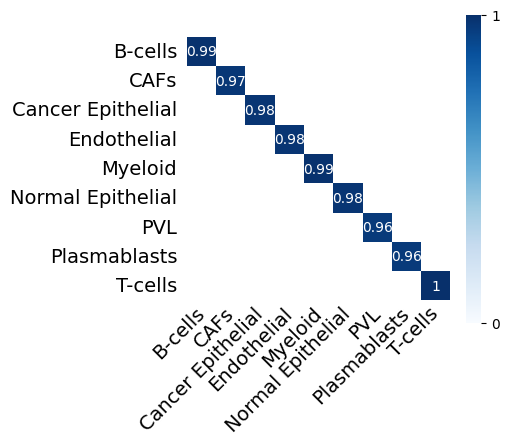

In [3]:
cm.train(Dataset, Label=Label, Project=Project, batch_size=batch_size,exp_bin='bin_scale', use_amp=False, mode='full')

# Inference
During the inference, the parameter settings must remain consistent with those used during the training.

In [4]:
# > inference
batch_size = 1024
test_data = sc.read_h5ad('hBreastCancer_xenium_test.h5ad')
test_data = test_data[np.random.choice(test_data.shape[0], test_data.shape[0], replace=False), :]

In [5]:
adata_pred = cm.generate(test_data, Project=Project, batch_size=batch_size, out_tag=True,exp_bin='bin_scale', mode='full')


Loading Model from: cm_hBreastCancer
Reference Categories: 9
Query set: (305631, 301)
Query Max bins: 50
Ref Max bins: 50
use topk: False
==> Resuming from checkpoint..
Using 1 GPU.
CellMemory is deciphering query cells..


# Get cell embedding using cls embedding

In [6]:
sc.set_figure_params(figsize=(5, 5))
os.chdir(Project)
cls=adata_pred.cls

sc.pp.pca(cls)
sc.pp.neighbors(cls)
sc.tl.umap(cls)

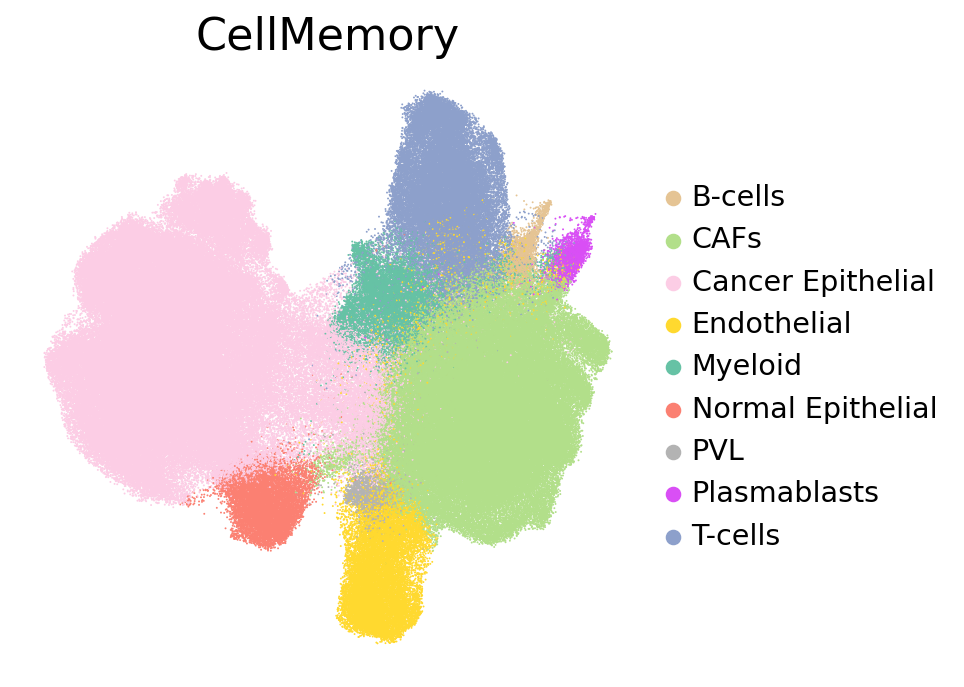

In [7]:
cls.uns['cm_pred_colors'] = ['#e5c494', '#b2df8a', '#fccde5', '#ffd92f', '#66c2a5','#fb8072','#b3b3b3','#d94ff5','#8da0cb']
sc.pl.umap(cls, color='cm_pred', frameon=False,show=False,use_raw=False,size=3)
plt.title('CellMemory', fontsize=20)
plt.savefig('cm_cls_pred.png', dpi=300, bbox_inches="tight")

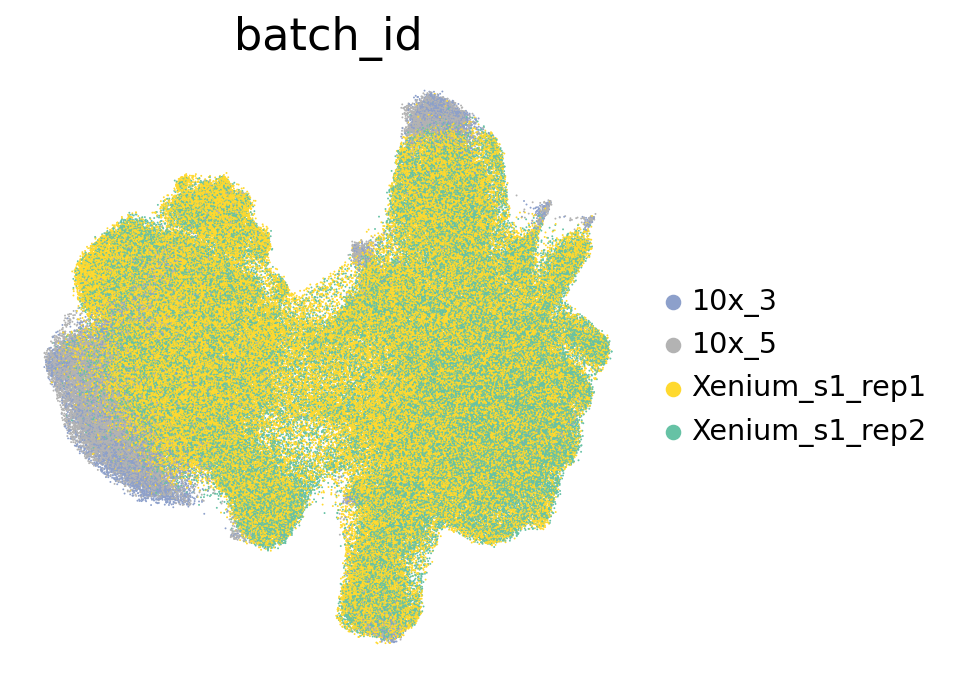

In [8]:
cls.obs['batch_id'] = test_data.obs['batch_id']
cls.uns['batch_id_colors'] = ['#8da0cb', '#b3b3b3', '#ffd92f', '#66c2a5']
sc.pl.umap(cls, color='batch_id', frameon=False,show=False,use_raw=False,size=3)
plt.title('batch_id', fontsize=20)
plt.savefig('cm_cls_batch_id.png', dpi=300, bbox_inches="tight")

In [9]:
cls.write('cm_cls.h5ad')

# We chose a section of breat cancer sample, to visualize the spatial distribution of cells.

In [10]:
adata_xenium1=test_data[test_data.obs.batch_id.isin(['Xenium_s1_rep1']),:]
adata_xenium1.obs['cm_pred'] = cls[adata_xenium1.obs.index,:].obs['cm_pred']
adata_xenium1.uns['cm_pred_colors'] = ['#e5c494', '#b2df8a', '#fccde5', '#ffd92f', '#66c2a5','#fb8072','#b3b3b3','#d94ff5','#8da0cb']
sc.set_figure_params(figsize=(5.5, 4))
adata_xenium1.obsm['spatial'] = np.vstack((adata_xenium1.obs.x_centroid, adata_xenium1.obs.y_centroid)).T

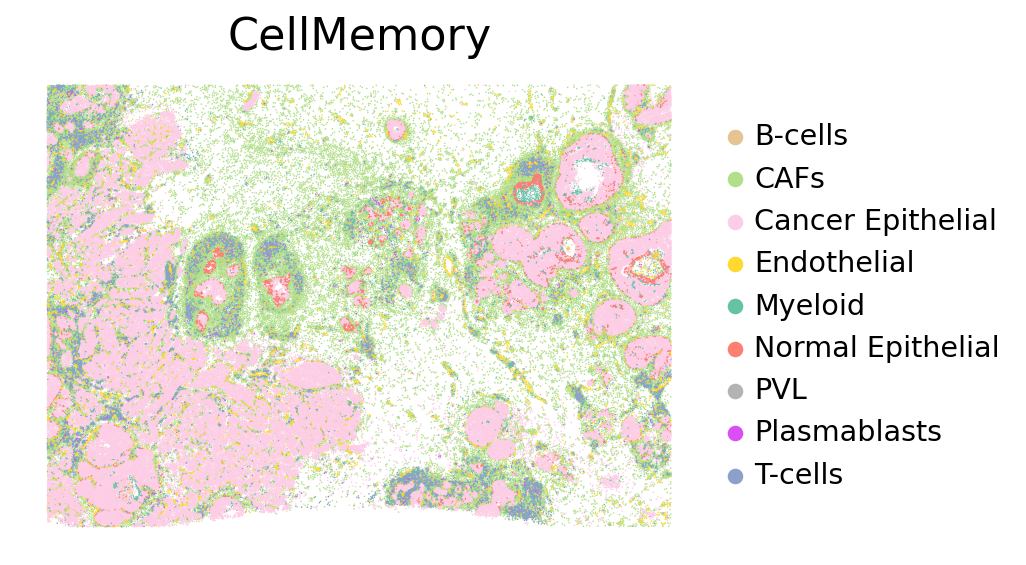

In [11]:
sc.pl.embedding(adata_xenium1, basis='spatial', color='cm_pred', frameon=False, show=False, size=2)
plt.title('CellMemory', fontsize=20)
plt.savefig('spatial_cm_pred.png', dpi=300, bbox_inches="tight")

# Visualize attention score / expression of gene in spatial distribution.

In [12]:
adata_attn=adata_pred.memory_score
adata_xenium1_attn = adata_attn[adata_xenium1.obs.index,:]
adata_xenium1_attn.obsm['spatial'] = adata_xenium1.obsm['spatial']

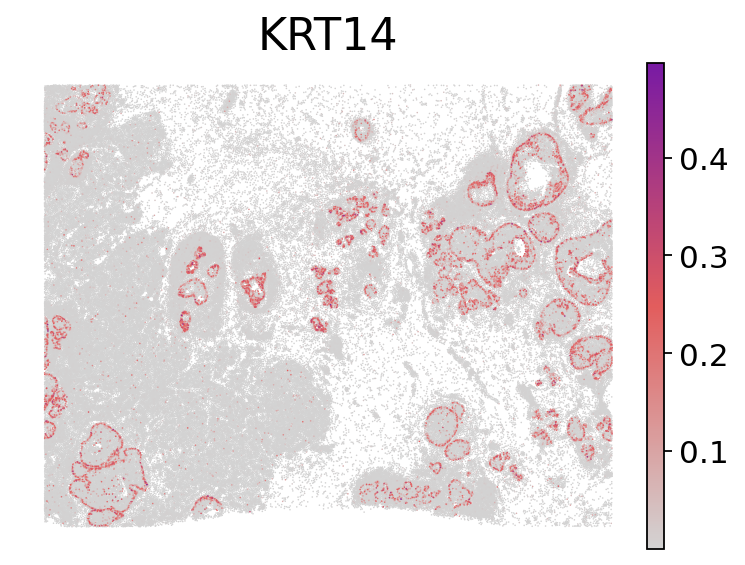

In [13]:
# attention score of KRT14
sc.pl.embedding(adata_xenium1_attn, basis='spatial', color='KRT14', frameon=False, show=False, size=2, cmap=plot.createCorlormap('attn'))
plt.title('KRT14', fontsize=20)
plt.savefig('spatial_attn_KRT14.png', dpi=300, bbox_inches="tight")

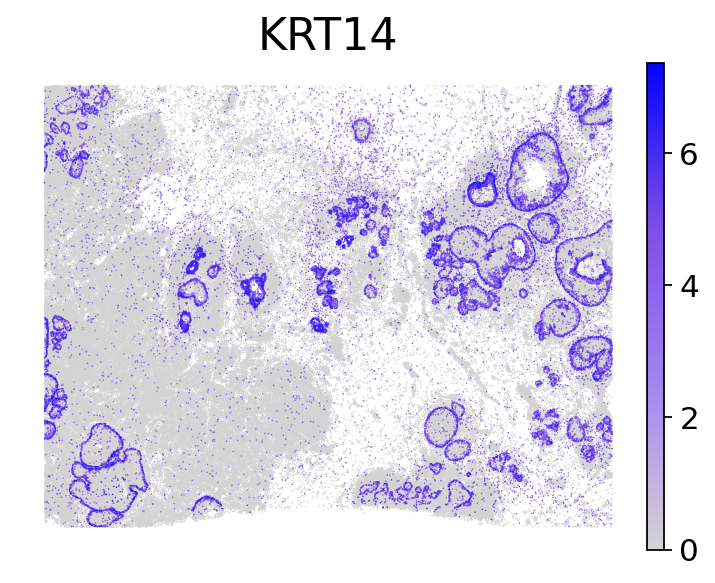

In [14]:
# gene expression of KRT14
sc.pl.embedding(adata_xenium1, basis='spatial', color='KRT14', frameon=False, show=False, size=2, cmap=plot.createCorlormap('exp'))
plt.title('KRT14', fontsize=20)
plt.savefig('spatial_exp_KRT14.png', dpi=300, bbox_inches="tight")

In [15]:
adata_xenium1_attn.write('adata_xenium1_attn.h5ad')